In [20]:
from ReAudio_group import ReAudio
# Time for each entry - 200ms
from scipy.signal import find_peaks
import  matplotlib.pyplot as plt

In [99]:
re = ReAudio('Anu_study1_doa_first_20_mins.csv')

-------------ReAudio Library----------
Initializing.....
   Loading file


In [101]:
grp1 = re.assignUserLabel(group='group-1')

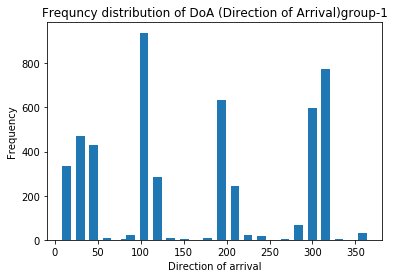

[268, 284, 331, 358]

In [103]:
re.getHighestFourDegrees(plot=True,group='group-1')

In [105]:
x = grp1['degree']
x = x.to_list()
import numpy as np
#peaks = count_dist_peaks(x,36)



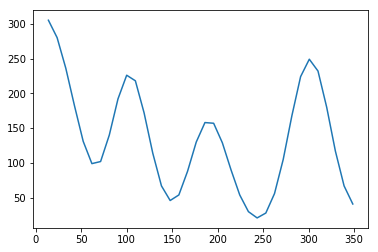

array([ 9, 18, 30])

In [126]:
peaks = count_dist_peaks(x,36,2)
peaks


In [87]:
from scipy.ndimage import gaussian_filter1d
y3 = gaussian_filter1d(x, 6)
count, division = np.histogram(y3, bins=36)
plt.plot(division[:-1], count)

TypeError: histogram() got an unexpected keyword argument 'sigma'

In [86]:
def count_dist_peaks(series, bins,sigma):
    count, division = np.histogram(series, bins=bins)
    count = gaussian_filter1d(count,sigma)
    peaks, props = find_peaks(count)
    plt.figure()
    plt.plot(division[:-1], count)
    plt.show()
    return peaks

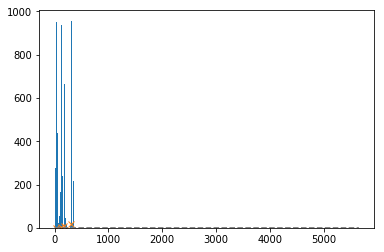

array([ 1,  6,  9, 17])

In [64]:
plt.hist(x,bins=20)
plt.plot(division[peaks], peaks, "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
peaks

In [65]:
division[peaks]

array([ 31.2, 117.2, 168.8, 306.4])

# Testing PyDoA

In [26]:
from DoaProcessor import DoaProcessor
d = DoaProcessor('./samples/sample.csv',4)
d.setDegreeForSpeaker(d.getHighestNdegrees(sep=60))

PyDoA Library
[ 2020-01-16 10:23:26.889062 ] Initialized
[ 2020-01-16 10:23:26.889174 ] File loaded successfully


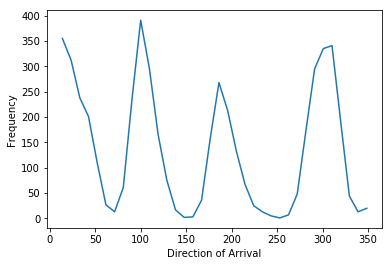

array([100.        , 186.        , 310.22222222])

In [27]:
d.getPeakDegree(group='group-1',sigma=1.0)

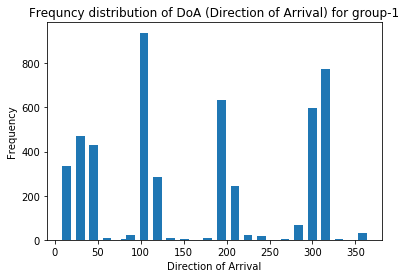

In [10]:
d.plotDegreeDistribution(group='group-1')

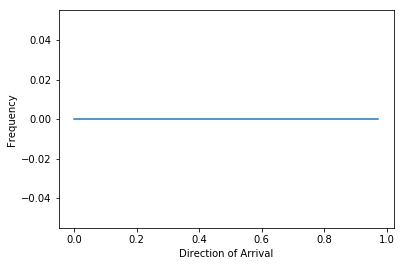

array([], dtype=float64)

In [25]:
d.getPeakDegree(1.5)

In [21]:
d.getHighestNdegrees(sep=50)

[30, 104, 194, 315]

In [3]:
d = {104: 939, 315: 775, 194: 636, 300: 597, 30: 470, 45: 432, 14: 335, 120: 285, 210: 245, 284: 65, 358: 31, 88: 23, 225: 20, 241: 18, 61: 10, 178: 8, 135: 7, 82: 4, 331: 2, 151: 2, 268: 2, 337: 1}

In [5]:
d.getHighestNdegrees(sep=60)

[30, 104, 194, 315]

In [2]:
d.setDegreeForSpeaker([30, 104, 194, 315])

In [2]:
a = d.assignUserLabel()
a.groupby('users').count()

,group,timestamp,degree
users,,,
1,1247,1247,1247
2,1258,1258,1258
3,929,929,929
4,1473,1473,1473


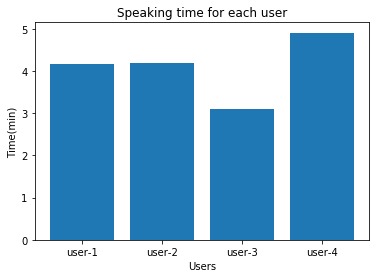

{1: 4.156666666666667, 2: 4.193333333333333, 3: 3.0966666666666667, 4: 4.91}

In [23]:
d.getSpeakingTime(plot=True,time='min')

In [7]:
xlabels = []
for i in range(4):
    xlabels.append('user-%d'%(i+1))

/Users/pankaj/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


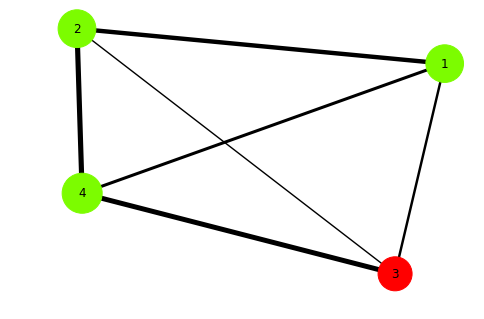

NameError: name 'plt' is not defined

In [24]:
d.drawNetwork('group-1')
plt.title('Group-1 Network')

In [ ]:
d.generateEdgeFile()